# Deep Learning

In DL, as opposed to ML, the algorithm attempts at feature extraction AND classification. 

Neural networks; also called multilayer perceptrons. Field that uses NN - Deep Learning. 

Has input layer, hidden layers, and output layer. Hidden layer adds a layer of complexity in order to be able to recognise patterns. 

Features:
- NNs are recommended for unstructured data (images, audio, text)
- Work well on all types of data
- May be slower than a decision tree or other algorithms
- Works with transfer learning
- Work \ learn well from large datasets


# Datasets


In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds

# mnist_data = tfds.load('mnist')
mnist_data = tfds.load('fashion_mnist')
mnist_train, mnist_test = mnist_data['train'], mnist_data['test']
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [11]:
for i in tfds.as_numpy(mnist_train):
    print(i)
    break

{'image': array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 6

# Artificial neuron

> A neuron is basically a function that receives values of all previous neurons / input layer and produces an activated output value. 

Artificial Neuron first receives input as a vector of features $x$, to which a linear function with weights (vector / matrix) and biases (scalar) is applied to produce intermediate output $z$. Finally, this intermediate output is processed with a sigma (activation) function $\sigma(z)$ to produce final output $a$ for that neuron; in a sense, activation function determines whether the signal is propagated or detained. This output $a$ combines with those of other neurons in the same layer and are transferred as a vector to the next layer of neurons. 

Each neuron produces an **activation value**.

$$ \text{Input: } x $$

$$ \sum_{i=1}^{n} ( x_{i} w_{i} + b_{i} ) => z $$

$$ \sigma(z) = a $$ 

, where:
- $x$, input vector; $x\in \mathbb{R}^n$
- $w$, vector of weights; 
- $b$, constant / bias; 
- $\sigma(x)$, activation function; 
- $a$, output. 

<img src="Media/artificial_neuron.png" width=600>

<img src="Media/perceptron3.png" width=500>

<img src="Media/neuron.png" width=700>


Depending on the activation functions, neurons can be:
- Perceptron: activation function is binary / step function, therefore such a neuron produces a single binary output (0 or 1); the simplest type of neuron;
- Sigmoid neuron: small changes to the weights and bias cause only small change to their output. 

> Some classic ML algorithms can be classified as one-layer neurons:
> - Linear regression (for regression): $z = wx+b$, then the output of the neuron is $z$ activated by a linear function (i.e. the value stays the same);
> - Logistic regression (for classification): $z = wx+b$, then the output of the neuron is $z$ activated by sigmoid function: $\sigma(z) = a$
> - More info on logistic regression being a single neuron model: https://thedatafrog.com/en/articles/logistic-regression/#:~:text=that%20a%20neural%20network%20is,equivalent%20to%20a%20logistic%20regression.



# Artificial neural network

**Neural Network**:

Neural networks consist of architecture (neurons and their connections) and their weights. NNs are algorithms that mimic the human brain and started out by being inspired by the organisation of a human brain, but that is not how the brain actually works. In a sense, NN is like a collection of perceptrons (linear classifiers) that gives rise to nonlinear classification. Basically, with each layer you kind of generate a new set of features that are a better predictor for your data. NN learns (and adjusts) the importance of features by itself. Activations from neuron layers are higher-level features.

Some key concepts:
- **Depth of a NN** is the number of layers, excluding the input layer
- Neural networks always have a bias at every layer, but are often drawn without it
- You can play around with understanding NN in [TensorFlow Playground](https://playground.tensorflow.org)

Types of layers in NN:
1. **Input layer**: the first layer of a neural network; receives the input data. <u>The number of nodes in this layer corresponds to the number of features in the input data</u>. 
2. **Hidden layers**: these layers are located between the input and output layers; are responsible for transforming the input data into a representation that is suitable for the output layer. There are different types of hidden layers:
   - **Dense (fully connected) layer**: the most common type of hidden layer. In this layer, each neuron is connected to every neuron in the previous layer; iow, each neuron output is a function of all the activation outputs of the previous layers. The neurons in the dense layer learn to extract relevant features from the input data by computing a weighted sum of the input features and applying an activation function to the result. 
   - **Convolutional layer**: is used for processing data that has a grid-like structure, such as images. Convolutional layers apply filters to the input data to detect patterns or features, and they are commonly followed by pooling layers that reduce the spatial dimensions of the data. Here, each neuron only looks at part of the previous layer's output.
   - **Dropout**: used for regularisation (??). There is a probability that some neurons from the previous layer will not pass into the subsequent layer.
   - **Recurrent Layer**: connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. This allows it to exhibit temporal dynamic behavior.
1. **Output Layer**: This is the final layer of a neural network, which produces the output or prediction of the model. <u>The number of nodes in this layer depends on the type of problem being solved</u>. For example, in binary classification, there is usually one output node that represents the probability of the input belonging to one of the two classes, while in multi-class classification, there are multiple output nodes representing the probabilities of the input belonging to each class.

Highlights and important rules:
- Depending on the number of hidden layers, NN can be shallow (1 hidden layer) and deep (multiple hidden layers).
- Generally, neural networks can be feedforward (sequential), where input of each layer is strictly output of the previous layer, and recurrent neural networks, where there can be feedback loops. 
- **Number of parameters for each layer** equals to the number of neurons at this layer times number of features (weights) that each neuron receives from the previous layer (or number of neurons at the previous layer) plus the number of neurons at this layer. We do NOT count the input layer. For instance, if we have a NN with 5 inputs, 16 nodes in hidden layer 1, 15 nodes in hidden layer 2, and 10 nodes in the output layer, we have a total number of learnable parameters:
  - Number of params at hidden layer 1: $5*16 + 16 = 96$
  - Number of params at hidden layer 2: $16*15 + 15 = 255$
  - Number of params at output layer: $15*10 + 10 = 160$
  - Total number of learnable parameters = $96 + 255 + 160 = 511$
- We do not count input layer as our NN's size. E.g. 3 layers NN = input layer, 2 hidden layer, and a output layer. 
- **Backpropagation** (backward propagation): algorithm for learning; adjustments of weights by the propagating error from the output layer.
  - Basically, backpropagation allows us, given the final output error, to adjust the weights and biases moving backward (up to the first hidden layer), by utilising partial derivatives.
  We basically need to calculate partial derivatives of W1, W2, B1, B2, with respect to the cost function (at the end), which then allows us to calculate the slopes for each partial derivative (and thus adjust each parameter accordingly)
- **Forward propagation**: feeding a NN input data and seeing what the output it produces. Basically making a prediction; algorithm for propagating activations from neurons & making computations in the forward direction.

<img src="Media/nn-architecture.png" width=400>
<img src="Media/NN.png" width=600>



Training a Neural Network:
1. Begin by initialising all the weights and biases at random; 
2. Define an error function to measure the performance of the neural network; 
3. We repeatedly use the error function to tune in the weights and biases of the model to reduce the error function; 


Examples of NN applications: 
- Detect fraud in banks; 
- Microscope - recognise cancer cells; 
- Recognise voice; 
- Classification; 
- Image recognition; datasets - MNIST, CIFAR-10, CIFAR-100; 
- Chat bots. 

Model is adjusted by adjusting the weights so that the loss function is minimised. To do this, we need to know how the loss function value changes with respect to change of each parameter of the model:

$$\frac{\partial \text{Loss}}{\partial \alpha}(w,b;\:X)$$

, where $\alpha$ - parameter of a model. 

We can use simple calculus as a way to adjust the weights; however, it is too slow, as we might have millions / billions of weights.

The weights are ajusted using <u>backpropagation</u>, where the error from the output layer propagates back, adjusting weights. The advantage of backpropagation is that the change weights to loss function is only computed once. 



Error function, e.g. log loss function:
$$ \text{log loss} = -y ln(\hat{y}) - (1-y)ln(1-\hat{y})) $$
---

Yet another example of ANN:

<img src="Media/ML/NN-1.png" width=800>

$$\large a^{[layer]}_{[neuron]} \text{ : notation for a specific neuron in a specific layer}$$

$$\huge \text{General form: } a_{j}^{[l]} = g( \vec{w}_{j}^{[l]} \vec{a}^{[l-1]} + b_{j}^{[l]})$$
$$\large \text{, where } a_{j}^{[l]} \text{ - activation value of unit neuron j in layer l}, 
\\ g \text{ or } g(z) \text{ - activation function, e.g. sigmoid function}, 
\\ \vec{w}_{j}^{[l]} \text{ and } b_{j}^{[l]} \text{ - parameters (weights and biases) of neuron unit j in layer l }, 
\\ \vec{a}^{[l-1]} \text{ - output of layer l-1 (previous layer)}$$



**Example for hidden layer 1:**

Here, input is $\vec{x}$. The output is a vector $\vec{a}^{[1]}$ (a vector of activation values from layer 1), which is then passed on to the next hidden layer.

<img src="Media/ML/NN-2.png" width=800>

**Example for hidden layer 2:**

<img src="Media/ML/NN-3.png" width=800>

---

In a more general form, here is the equation for the final output of a neuron (below equations are given for the hidden layers, therefore instead of $x$ / features as input we use $a$, which is the output of the previous layers):

$$\text{Weight matrix for all neurons in all layers:} \hspace{5em} W_n=\begin{pmatrix} w_{11} & w_{12} & \cdots & w_{1k_{n-1}}\\w_{21} & w_{22} & \cdots & w_{2k_{n-1}}\\ \vdots & \vdots & \ddots & \vdots \\ w_{k_n1} & w_{k_n2} & \cdots & w_{k_nk_{n-1}} \end{pmatrix}$$

$$\text{Vector output of the first neuron of the layer $L_{n}$: } \hspace{5em} a_{1,\:n}=\sigma\left(\sum_{i=1}^{k_{n-1}}w_{1\:i,\:n}\cdot a_{i,\:n-1} + b_n\right)$$


$$\text{A more general form, vector output from layer $L_{n}$ composed of $j$ neurons:} \hspace{5em} a_{j,\:n}=\sigma\left( \sum_{i=1}^{k_{n-1}}w_{ji,\:n}\cdot a_{i,\:n-1}+b_n \right)$$

$$\text{General form, connections from $L_{n-1}$ to the layer $L_{n}$:} \hspace{5em} a_n = \sigma(W_n\cdot a_{n-1} + b_n)$$

---

Another way to write it: 

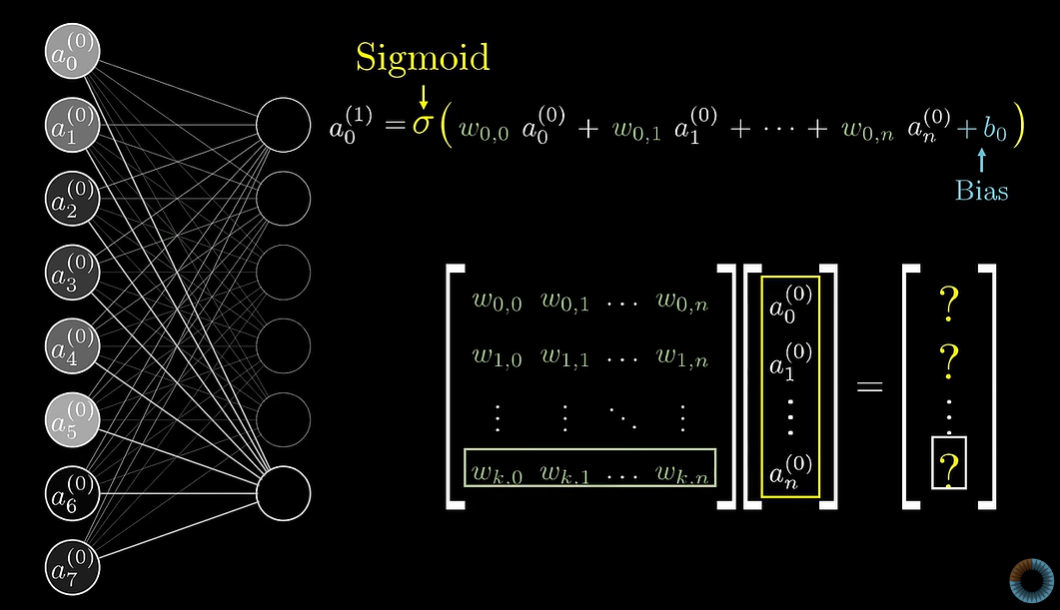


## Architecture design

**Main rule of NN**: don't use linear activation functions in the hidden layers. Use non-linear functions instead, e.g. ReLU.

NNs are low-bias machines: if you make a NN complex enough (structurally), it will almost always fit the data you give it.

$J_{train} = high?$ Use bigger network. 

$J_{valid} = high?$ Get more data.

## Dense layer Vectorised

In [2]:
"""
Let's imagine the following:
- Input layer = 2 data points
- Dense layer 1 = 3 neurons
"""
import numpy as np

### input
X = np.array([[200, 17]])
### weights
W = np.array([[1, -3, 5], 
              [-2, 4, -6]])
### biases
B = np.array([[-1, 1, 2]])

def dense():
    Z = np.matmul(X, W) + B
    a_out = g(Z) # g is an activation function
    return a_out

np.matmul(X, W)

array([[ 166, -532,  898]])

## Training

Hyperparameters that can be used in DL:
- Learning rate
- number of epochs
- choice of optimisation function
- how many points do we consider at once, e.g. batch vs mini-batch vs stochastic gradient descent;
- architecture of a NN: number of layers, number of nodes per layer, activation functions
- regularisation - L1 or L2
- dropout

Transfer learning: take a pre-trained NN (such as examples below) and tweak some parameters, usually just the last layer, or just fine-tune train on your own data. E.g. ytou have a pre-trained model ImageNet with many classes, and then you fine-tune it to classify a few classes of flowers. 

Examples:
- InceptionV3
- ImageNet
- ResNet
- VGG

## Problems during training


### Overfitting

Solved by:
- Regularisation
- Dropout - to make sure that a few strong nodes are not dominating the training
  - The dropout process attaches a small probability $p$ to each neuron, and in each epoch of the training process, each neuron is removed with probability $p$, and the neural network is trained only with the remaining ones. Dropout is ONLY used in the hidden layers. 



### Vanishing gradient

e.g. using sigmoid function (logistic) as error function in the hidden layers - it is too flat on the edges, so we can have diminishing gradient closer to the ends. 

Solved by using different activation functions:
- tanh
- ReLU


# Types of ANN based on structure

**Artificial NN (ANN)** is a general, broad term used to describe a class of models inspired by the structure and function of biological neurons in the brain. Types of ANN:
- **FNN**
- **CNN**: 
  - designed for processing grid-like data, e.g. images and videos
- **RNN** (recurrent NN): 
  - sequence-to-sequence models (seq2seq), designed for processing sequential data e.g. text and time series data;
  - used for text-to-speech applications;
  - **LSTM** (long short-term memory) networks:
    - a type of RNN that are designed to overcome the vanishing gradient problem; 
    - model long-term dependencies in sequential data;
    - used for predicting time series, or forecasting
  - **GRU** (gated recurrent units): a type of RNN;
    - computationally more efficient than LSTMs
- **Transformers**:
  - NN architectures using encoders and decoders;
  - self-attention mechanisms, enabling models to capture long-range dependencies and contextual information efficiently; 
  - from the paper "Attention Is All You Need" by Ashish Vaswani et al. 2017



## FFN

**Feedforward Neural Network (FNN)**, **Fully Connected Network (FCN)**, **Feedforward ANN**

A type of NN where:
- Each node from the previous layer connects to each node from the next layer;
- No connections exist between non-consecutive layers.

Thus, here the information flows in one direction only - from input to output.

DNN is connected to every node from the previous layer. For this image classification project, the DNN looks at the whole picture at once, and learns patterns. DNN is very important for global patterns, but not for local patterns. E.g. if you flip the picture, it won't recognise the pattern again.

E.g. if we consider a digit recognition task, ANN will flatten the input into a 1D array. Then, passing through hidden layers, we get output for which label it is likely to be. 

<img src="Media/ann.png" width=400>

Disadvantages:
- Too much computation. 
- For image classification, sensitive to location of object in the image. 
- Doesn't consider spatial architecture of the data.



### Forward propagation



In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
np.random.seed(42)

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr')
### extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values
all_inputs, all_outputs

(array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.50196078],
        [0.        , 0.        , 0.54509804],
        ...,
        [0.38039216, 0.38039216, 0.38039216],
        [0.38823529, 0.72156863, 1.        ],
        [0.38823529, 0.38823529, 0.38823529]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [27]:
### split train and test data setes
X_train, X_test, Y_train, Y_test = train_test_split(
	all_inputs, 
	all_outputs,
	test_size = 1/3
)
### number of training records
n = X_train.shape[0]


<img src="Media/ML/nn-example.png" width="650">

In [45]:
### build neural network with weights and biases with random initialisation
# np.random.seed(42)
# w_hidden = np.random.rand(3, 3)
# w_output = np.random.rand(1, 3)
# b_hidden = np.random.rand(3, 1)
# b_output = np.random.rand(1, 1)

w_hidden = np.array([
	[0.034535, 0.5185636, 0.81485028],
	[0.3329199, 0.53873853, 0.96359003],
	[0.19808306, 0.45422182, 0.36618893]
])
w_output = np.array([0.82652072, 0.30781539, 0.93095565])
b_hidden = np.array([
	[0.41379442],
	[0.81666079],
	[0.07511252]
])
b_output = np.array([
	[0.58018555]
])

print( 'w_hidden\n', w_hidden, 
	  '\nw_output\n', w_output, 
	  '\nb_hidden\n', b_hidden, 
	  '\nb_output\n', b_output )

### we shall multiply (by normal matrix multiplication) w_hidden and X (input) and add B array
"""
for neuron 1 of the hidden layer, 
weights 0.034, 0.518, 0.814 
are mutiplied with the first data point's 
values for three different variables 0.678, 1, 0.184
"""
X_test.transpose()

w_hidden
 [[0.034535   0.5185636  0.81485028]
 [0.3329199  0.53873853 0.96359003]
 [0.19808306 0.45422182 0.36618893]] 
w_output
 [0.82652072 0.30781539 0.93095565] 
b_hidden
 [[0.41379442]
 [0.81666079]
 [0.07511252]] 
b_output
 [[0.58018555]]


array([[0.77254902, 0.07058824, 1.        , ..., 0.92156863, 0.75686275,
        0.54509804],
       [0.75686275, 0.07058824, 0.97254902, ..., 0.92156863, 0.75686275,
        0.21176471],
       [0.66666667, 0.07058824, 0.8627451 , ..., 0.92156863, 0.75686275,
        0.14901961]])

In [17]:
### activation function
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# runs inputs through the neural network to get predicted output
def forward_prop(X):
	### layer 1 - hidden layer
	### we multiply each row of w_hidden (each row being a set of weights for a node) 
	### with the vector X
	Z1 = w_hidden @ X + b_hidden # unactivated output from the layer
	A1 = relu(Z1) # activated output from the layer
	### A1 is a vector of three activated outputs (3D vector), one from each neuron
	### layer 2
	Z2 = w_output @ A1 + b_output
	A2 = logistic(Z2)
	return Z1, A1, Z2, A2

### calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print(f"Accuracy: {accuracy}")

Accuracy: 0.6146993318485515


### Perceptron (discrete)

**The Perceptron** is one of the simplest ANN architectures. It is an artificial neuron with 

- Perceptron is a linear classifier consisting of a single dense layer of TLU (threshold logic unit) / LTU (linear threshold unit);
- Step function means that a perceptron's output is binary (returns a boolean)
- Perceptron uses a linear classification algorithm that separates two classes by a line (hyperplane). The simplest type of NN
- Classifier with N features is represented as an $(n-1)$-dimensional hyperplane.

$$ \hat{y} = step( f(x) ) = step(w_{1}x_{1} + w_{2} x_{2} + ... + w_{n} x_{n} + b) = step( b + \sum_{i=1}^{n} w_{i} x_{i} ) $$

| Image | Equation |
| - | - |
| <img src="Media/tlu.png"> | $f(x) = \begin{cases} 1 & \text{ if  } wx+b>0 \\ 0 & \text{ otherwise }  \end{cases}$ |

For example, the perceptron shown below takes two inputs (x1, x2) and produced three outputs, one for different binary class.

<img src="Media/perceptron.png">

Each output neuron's decision boundary is a straight line, thus Perceptrons cannot acquire intricate patterns (similar to Logistic Regression classifiers). Nonetheless, if the training examples can be separated by a straight line, Rosenblatt proved that this algorithm would reach a solution. This theorem is referred to as the Perceptron convergence theorem.

---

**Pseudocode for the Perceptron Algorithm**: 

<u>As input in each epoch, we have</u>:
- Perceptron with weights $a$, $b$, and bias $c$;
- A point with coordinates $(x_{1}, x_{2})$ and label $y$;
- Learning rate $\eta$

<u>Output</u>:
- Perceptron with new values for weights $a'$, $b'$ and bias $c'$

<u>Procedure</u>:
- Start with random values for weights and bias of perceptron classifier;
- For many iterations / epochs:
  - Make a prediction: $ \hat{y} = step(ax_{1} + bx_{2} + c) $
  - Return new perceptron
    - *Note that $(y - \hat{y}) \in {0, -1, 1}$*
    - If the line classifies a data point correctly, the line stands still (weights and bias are not changed)
    - If the line misclassifies a data point, adjust the weights and biases a little so that the classification line moves closer to the data point

$$ a' = a + \eta(y-\hat{y}) x_{1} $$
$$ b' = b + \eta(y-\hat{y}) x_{2} $$
$$ c' = c + \eta(y-\hat{y}) $$

- Now the error should be a little smaller.

In the end, you can have $\hat{y} = 0$ for class 0 or $\hat{y} = 1$ for class 1. 



##### 1 (by hand)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df.head()

,feature 1,feature 2,label
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


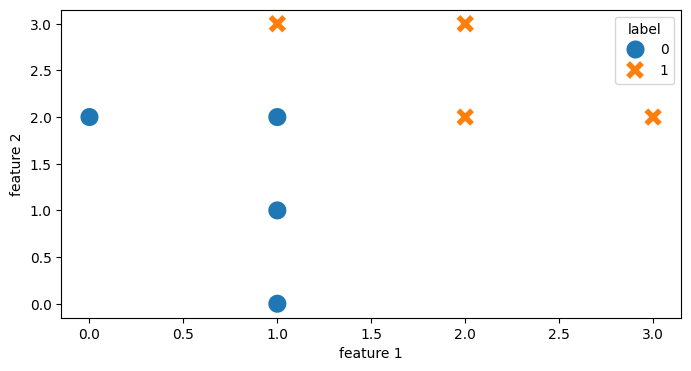

In [5]:
plt.figure(figsize=(8,4));
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=200, 
	hue=df['label']
	# markers={'feature 1':'s', 'feature 2': 'X'}
);

In [6]:
# Coding the perceptron trick

def score(weights, bias, features):
    """
    this is a continuous prediction before applying the step function
    """
    return np.dot(features, weights) + bias 

def step(x):
    """
    applies the step function to the score x
    """
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    """
    calculates error for prediction for one data point
    """
    pred = prediction(weights, bias, features)
    ### If the prediction is equal to the label,
    ### then the point is well classified,
    ### which means the error is zero
    if pred == label:
        return 0
    ### If the prediction is different from the label, then the point is misclassified,
    ### which means that the error is equal to the absolute value of the score
    else:
        return np.abs( score(weights, bias, features) )

def mean_perceptron_error(weights, bias, features, labels):
    """
    calculates the mean of errors of all data points in the dataset
    """
    total_error = 0
    ### Loops through our data, and for each point, adds the error at that point, then returns this error
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    ### Get mean error
    return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        ### updates the weights and biases using the perceptron trick
        weights[i] += (label-pred) * features[i] * learning_rate
    bias += (label-pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, 
                         labels, 
                         learning_rate=0.01, 
                         epochs=200,
                         visualise=True
                         ):
    """
    Starts with randomly-initialised perceptron classifier 
    and repeats the perceptron trick for many iterations
    """
    ### Initialises the weights to 1 and the bias to 0 (essentially, random numbers)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    cumulative_weights_bias = []
    ### Repeat for N number of epochs
    for epoch in range(epochs):
        ### Calculate mean perceptron error
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        ### Pick a random point in the dataset
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
        cumulative_weights_bias.append([ weights, bias ])
        # Draw a graph
        datapoints = np.arange(0, 4, 1)
        a = weights[0]
        b = weights[1]
        c = bias
        if visualise:
            sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , alpha=0.05, color='grey'  )
    return weights, bias, cumulative_weights_bias, errors



0.4199999999999995
0.10999999999999936
-0.6900000000000004


Text(0.5, 1.0, 'Classifier\nRed line (decision border) equation: 0=0.42x1 + 0.11x2 + -0.69\nPrediction: y = 0.42x1 + 0.11x2 + -0.69')

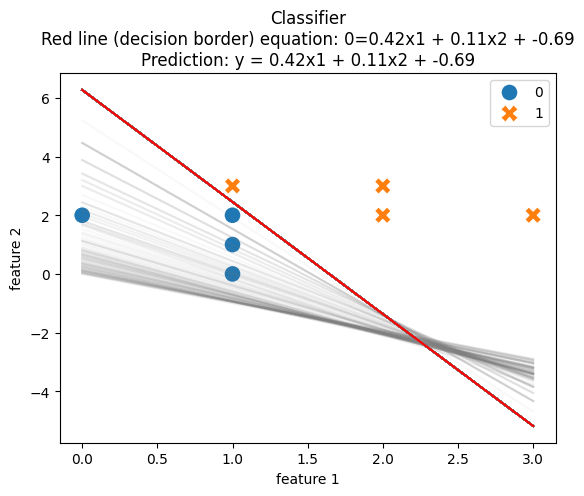

In [7]:
# Plot
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=150, 
	hue=df['label'], 
	# markers={'feature 1':'s', 'feature 2': 'X'}
)

output = perceptron_algorithm(features, labels, epochs=300)
a = output[0][0]; print(a) # "a" is the weight for x-axis feature
b = output[0][1]; print(b) # "b" is the weight for y-axis feature
c = output[1]; print(c)

datapoints = np.arange(0, 4, 1)
sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , color='red'  )
# plt.text(rf'$0={a:.2f}x_1 + {b:.2f}x_2 + {c:.2f}$');
plt.title(f'Classifier\nRed line (decision border) equation: 0={a:.2f}x1 + {b:.2f}x2 + {c:.2f}\nPrediction: y = {a:.2f}x1 + {b:.2f}x2 + {c:.2f}')

Text(0.5, 0, 'Iteration')

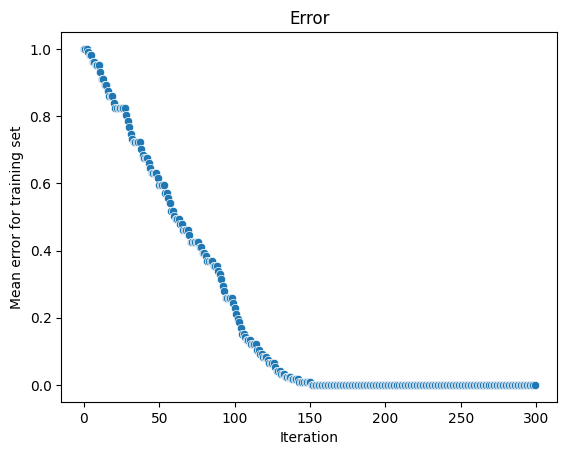

In [8]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

##### 1.1

same but for more features and all of them are binary.

In [9]:
import numpy as np

features = np.array([ [0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,0],[0,0,0,1] ])
labels = np.array([1,1,1,1,0,0,0,0])

# df = pd.DataFrame({
# 	'feature 1': features[:,0], 
# 	'feature 2': features[:,1],
# 	'label': labels
# })

# df.head()

output = perceptron_algorithm(features, labels, epochs=1000, visualise=False)

In [10]:
output[0], output[1]

([0.5499999999999996,
  0.4599999999999995,
  0.5899999999999996,
  0.46999999999999953],
 -1.0700000000000007)

Text(0.5, 0, 'Iteration')

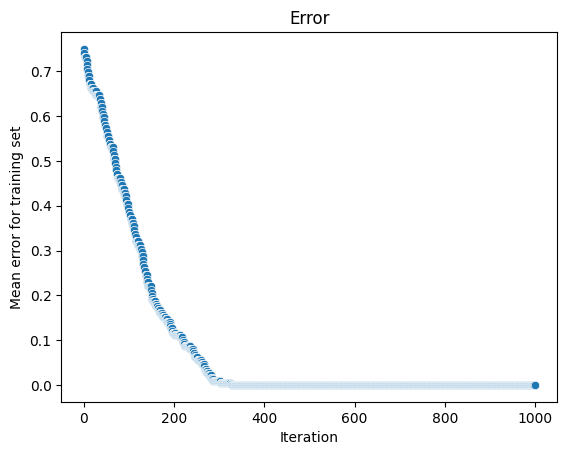

In [11]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

In [15]:
output[0]

[0.5499999999999996,
 0.4599999999999995,
 0.5899999999999996,
 0.46999999999999953]

In [32]:
### Predict the labels for the training set
predictions = list()
for i in features:
    prediction = np.dot(output[0], i) + output[1]
    if prediction > 0:
        predictions.append(1)
    else:
        predictions.append(0)
predictions

[1, 1, 1, 1, 0, 0, 0, 0]

##### 2 

In [ ]:
import numpy as np, pandas as pd
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, seaborn as sns

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

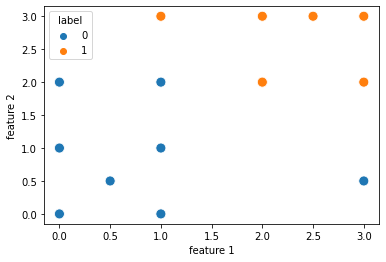

In [ ]:
# Let's stay that we start with vectorised data
# First, let's convert it to a Pandas dataframe

features = np.array([[3,0.5],[0.5,0.5],[0,0],[0,1],[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2],[3,3],[2,2],[2.5,3]])
labels = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100 )

In [ ]:
# Next, let's vectorise the data from Pandas dataframe back into a vector

X = df[['feature 1', 'feature 2']].values
print(X)
y = df['label'].values
print(y)

[[3.  0.5]
 [0.5 0.5]
 [0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  2. ]
 [1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [2.  2. ]
 [2.  3. ]
 [3.  2. ]
 [3.  3. ]
 [2.  2. ]
 [2.5 3. ]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% of data is for testing 
print(X_train)
print(y_train)

# Train the model
model = Perceptron()
model.fit( X_train, y_train )

# Make predictions on the test portion of the data and calculate the accuracy
predictions = model.predict( X_test )
accuracy = metrics.accuracy_score( y_test, predictions )
print(predictions)
print(f"Accuracy: {accuracy}")

# Make a prediction of a certain value
a = [[1,1]]
print("predicted value: ", model.predict(a))



[[0.  1. ]
 [1.  1. ]
 [2.  3. ]
 [0.5 0.5]
 [3.  0.5]
 [1.  2. ]
 [3.  2. ]
 [2.  2. ]
 [2.  2. ]
 [0.  2. ]
 [1.  0. ]
 [1.  3. ]]
[0 0 1 0 0 0 1 1 1 0 0 1]
[0 1 1]
Accuracy: 1.0
predicted value:  [0]


[[2.5 2.5]]
2.5 2.5 -9.0


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

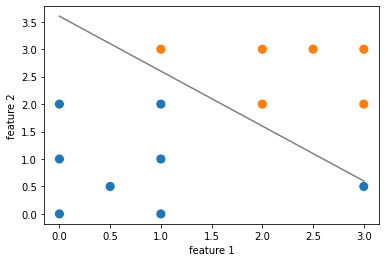

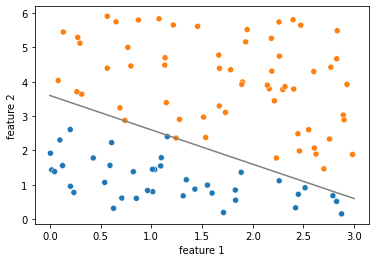

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot( data=df, x='feature 1', y='feature 2', hue='label', s=100, legend=False )

coefficients = model.coef_
print(coefficients)
coeff1 = coefficients[0][0]
coeff2 = coefficients[0][1]
intercept = model.intercept_[0]
print(coeff1, coeff2, intercept)
x = np.arange(0, 3.1, 1)
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

plt.figure(figsize=(6,4))
sns.lineplot( x, (-coeff1*x - intercept)/coeff2, color='grey' )

# Now let's visualise our data on some predicted values

features_predict = np.array( [ [random.uniform(0,3), random.uniform(0,6)] for i in range(100) ] )
labels_predict = np.array( model.predict(features_predict) )

df_predict = pd.DataFrame({
	'feature 1': features_predict[:, 0], 
	'feature 2': features_predict[:, 1], 
	'predicted labels': labels_predict
})
df_predict.head()

sns.scatterplot( data=df_predict, x='feature 1', y='feature 2', hue='predicted labels', legend=False )

# The final equation is x1*a + x2*b + c = 0, where a and b = model.coef_[0] and model.coef_[1]; c = intercept = model.intercept_[0]
# Also, equation can be written as: x2 = (-x1*a - c)/b


### MLP

**Multi-Layered Perceptron (MLP)**

Multiple perceptrons stacked on top of one another that can be used for regression and classification tasks. 

Definition can be ambiguous. 
- In some sources, MLP is an FFN composed strictly of MLP with a step function;
- In others, it refers to any FFN (with only sequential connections) with any activation function.

In [47]:
"""
Scikit-learn 's
multi-layer perceptron classifier
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")

# extract input variables (all rows, all columns but last column)
# note we should do some linear scaling here
X = (df.values[:, :-1] / 255.0)

# extract output column (all rows, last column)
Y = df.values[:, -1]

# separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver = 'sgd',
				   hidden_layer_sizes = (3, ),
				   activation='relu',
				   max_iter = 100_000,
				   learning_rate_init = 0.05)
nn.fit(X_train, Y_train)

# print weights and biases
print(nn.coefs_)
print(nn.intercepts_)

nn.score(X_train, Y_train), nn.score(X_test, Y_test)


[array([[ 2.51338305,  2.34749534,  0.62691815],
       [ 5.09747794,  4.70716705,  1.36849442],
       [ 0.96882987,  0.92598954, -0.4056976 ]]), array([[6.89221815],
       [6.25207198],
       [1.03814508]])]
[array([-3.83148818, -3.56193542, -0.55596717]), array([-5.87044662])]


(0.9966517857142857, 0.9977728285077951)

### PNN

Probabilistic Neural Networks (PNN) are a class of FFN that are mainly used for classification problems. 

Activation function in PNN is the radial basis function (RBF). 




### Simple NN (by hand)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))



In [7]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [8]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [9]:
# Define the activation function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

g = sigmoid

In [12]:
"""
Now let's code forward propagation
""";

def my_dense(a_in, W, b):
    """
    Computes the entire dense layer
    Args:
      a_in (ndarray (n, )) : Data that is inputted, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
          for instance, W = np.array([
                                        [-1, -3, 5],
                                        [2, 4, -6]
                                    ])
          is a matrix where
          each column represents weights for features (in this example, two features)
          for each of the three neurons (units)
      b    (ndarray (j, )) : bias vector, j units. Contains j bias values for j neurons (units)   
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1] # how many neurons there are
    a_out = np.zeros(units) # output vector containing activation value from each neuron
    for j in range(units): # for each neuron
        w = W[:,j] # get weights specifically for that neuron          
        z = np.dot(w, a_in) + b[j]         
        a_out[j] = g(z)               
    return(a_out)

def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1)
    a2 = my_dense(a1, W2, b2)
    return(a2)

"""
Weights and biases
that were obtained from training
""";
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = my_sequential(X[i], W1, b1, W2, b2)
    return(p)


X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


C:\Users\evgen\AppData\Local\Temp\ipykernel_13676\3250993447.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = my_sequential(X[i], W1, b1, W2, b2)


## CNN

> Convolutional Neural Network

*For more detailed information on the algorithm see the CV notebook.*

This architecture is a type of ANN used in CV and image recognition. The basic idea is to use sliding windows / filters (which represent filters for different features, for an illustrative examples we can think that there is one filter finding nose features, one filter for eye, etc.), check their presence in different locations of the grid by making a hotmap, and passing such a hotmap for every filter to the next level. At the next level, yet another filter is now applied for these passed-on heatmaps, to emphasise the localisations of these features. 

<img src="Media/cnn_architecture.png" width="700px">

<img src="Media/cnn3.png" width=600>

You can get a better intuition on how convolution works by seeing it like this: 

<img src="Media/cnn_1.png" width=600>
<img src="Media/cnn_2.png" width=600>
<img src="Media/cnn_3.png" width=600>
<img src="Media/cnn_4.png" width=600>



## RNN

### Vanilla RNN

**Recurrent NN (RNN)**

This layer / NN is used for processing **sequential data**, such as time series or natural language, where the current output depends on the previous outputs and inputs. Recurrent layers contain feedback connections that allow the network to remember previous information and use it to make predictions. Have time-varying behaviour. 

A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning

✅ Advantages:
- Handles variable-length input
- Learns sequential patterns automatically

❌ Disadvantages:
- Vanishing / exploding gradients: hard to train on long sequences
- Struggles with long-range dependencies: can't remember very far back

RNN models:
- Long short-term memory (LSTM): an RNN network architecture that has feedback links, unlike normal feed-forward neural networks. LSTM networks are well-suited for analyzing and learning sequential data, such as classifying, processing, and predicting data based on time series data. LSTM can be used when the data are in a sequential format, such as time, sentence, etc., and commonly applied in the area of time-series analysis, NLP, speech recognition, etc.
- Gated Recurrent units (GRU)

Basic algorithm explanation of RNN:

<img src="Media/ML/RNN-1.jpg" width=500>

Let's say `x1` = "Day Before Yesterday", `x2` = "Yesterday", etc.. 
- Feedback loop, where, for instance, we use input of Day Before Yesterday, obtain a value after activation = `sigma(x1w1 + b1)`
- Then step 2 - use input of Yesterday, and to it sum the bias which in this case is the output of the previous input, so now we get output of = `x2w1 + sigma(x1w1 + b1)`. 
- You keep going like this, until you reach the last level of Today, where instead of output being used as bias for another input, it is used to make the final prediction. 

<img src="Media/ML/RNN-2.jpg" width=800>

> Regardless of how many times we unroll a RNN, the weights and biases are shared across every input. This enables using as input a sequence of any length.


RNN not used often because of **The Vanishing / Exploding Gradient Problem**. The solution to this problem is found in using **LSTM**!

Example of the exploding gradient:

<img src="Media/ML/RNN-3.jpg" width=600>

Example of the vanishing gradient:

<img src="Media/ML/RNN-4.jpg" width=600>


In [67]:
"""
Here i will write a RNN unit that only does forward propagation,
so the weights and biases are already learned
"""

def RNN_unit(current_value: float, 
             w1: float, 
             b1: float, 
             w2: float, 
             w3: float, 
             b2: float
             
             ) -> tuple[float, float]:
    # intermediate output that is used in all steps except for the last one
    a1 = w1 * current_value + b1
    sigma_a1 = max(a1, 0)
    int_out = sigma_a1 * w2
    # final output - is only needed for the actual prediction in the last step
    a2 = w3 * sigma_a1 + b2
    sigma_a2 = max(a2, 0)
    return int_out, sigma_a2

def predict(sequence: list, 
            w1: float, 
            b1: float, 
            w2: float, 
            w3: float, 
            b2: float
            ) -> float:
    """
    Given a sequence, predict the next element using RNN.
    """
    final_index = len(sequence) - 1
    b = b1
    for index, i in enumerate(sequence):
        if index < final_index:
            b_new, _ = RNN_unit(i, w1, b, w2, w3, b2)
            b = round(b_new, 2)
        else:
            _, final_pred = RNN_unit(i, w1, b, w2, w3, b2)
            return round(final_pred, 2)

prediction = predict(
    sequence = (1, 2, 3, 4), 
    w1 = 1.8, 
    b1 = 0.0,
    w2 = -0.5,
    w3 = 1.1,
    b2 = 0.0
)
prediction

5.69

In [68]:
sequences = (
    (1, 0.5, 0.5, 1),
    (0, 0, 0),
    (0, 1, 2),
    (2, 1, 0),
    (2, 2, 2),
    (1, 2, 3, 4, 5),
    (1, 2, 3, 2.5, 4, 5)
)
for index, i in enumerate(sequences, 1):
    sequence_input = i[:-1]
    prediction = predict(
        sequence = sequence_input, 
        w1 = 1.8, 
        b1 = 0.0,
        w2 = -0.5,
        w3 = 1.1,
        b2 = 0.0
    )
    print(f" Sequence input: {sequence_input} | Last value expected: {i[-1]} | Predicted: {prediction}")

 Sequence input: (1, 0.5, 0.5) | Last value expected: 1 | Predicted: 0.99
 Sequence input: (0, 0) | Last value expected: 0 | Predicted: 0.0
 Sequence input: (0, 1) | Last value expected: 2 | Predicted: 1.98
 Sequence input: (2, 1) | Last value expected: 0 | Predicted: 0.0
 Sequence input: (2, 2) | Last value expected: 2 | Predicted: 1.98
 Sequence input: (1, 2, 3, 4) | Last value expected: 5 | Predicted: 5.69
 Sequence input: (1, 2, 3, 2.5, 4) | Last value expected: 5 | Predicted: 6.56


In [69]:
def RNN_unit_recursive(w1: float, 
                       b1: float, 
                       w2: float, 
                       w3: float, 
                       b2: float,
                       sequence: int,
                       current_level: int
                       ) -> float:
    if current_level == 0:
        b_input = b1
    else:
        b_input = RNN_unit_recursive(w1, b1, w2, w3, b2, sequence, current_level-1)
    b_input = round(b_input, 2)
    a1 = sequence[current_level] * w1 + b_input
    sigma_a1 = max(a1, 0)
    if current_level != len(sequence) - 1:
        return sigma_a1 * w2
    return sigma_a1

def predict_2(w1, b1, w2, w3, b2, sequence):
    """This is essentially the wrapper for the recursive RNN function"""
    highest_level = len(sequence) - 1
    return round(RNN_unit_recursive(w1, b1, w2, w3, b2, sequence, highest_level) * w3 + b2, 2)

predict_2(w1 = 1.8, 
        b1 = 0.0,
        w2 = -0.5,
        w3 = 1.1,
        b2 = 0.0,
        # sequence = (0, 0, 0)
        sequence = (1, 2, 3, 4)
)


5.69

In [70]:
sequences = (
    (1, 0.5, 0.5, 1),
    (0, 0, 0),
    (0, 1, 2),
    (2, 1, 0),
    (2, 2, 2),
    (1, 2, 3, 4, 5),
    (1, 2, 3, 2.5, 4, 5)
)
for index, i in enumerate(sequences, 1):
    sequence_input = i[:-1]
    prediction = predict_2(
        w1 = 1.8, 
        b1 = 0.0,
        w2 = -0.5,
        w3 = 1.1,
        b2 = 0.0,
        sequence = sequence_input
    )
    print(f" Sequence input: {sequence_input} | Last value expected: {i[-1]} | Predicted: {prediction}")

 Sequence input: (1, 0.5, 0.5) | Last value expected: 1 | Predicted: 0.99
 Sequence input: (0, 0) | Last value expected: 0 | Predicted: 0.0
 Sequence input: (0, 1) | Last value expected: 2 | Predicted: 1.98
 Sequence input: (2, 1) | Last value expected: 0 | Predicted: 0.0
 Sequence input: (2, 2) | Last value expected: 2 | Predicted: 1.98
 Sequence input: (1, 2, 3, 4) | Last value expected: 5 | Predicted: 5.69
 Sequence input: (1, 2, 3, 2.5, 4) | Last value expected: 5 | Predicted: 6.56


### LSTM

State-of-the-art before transformer architecture was RNN with encoder and decoder blocks.

```py
# Example NN with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

LSTM, by using separate paths for Long-Term Memories and Short-Term Memories, avoid the exploding/vanishing gradient problem, and that means we can unroll them more times to accommodate longer sequences of input data than a vanilla RNN. 

✅ Advantages:
- Much better at capturing long dependencies than vanilla RNNs
- Became the standard for sequence tasks (translation, speech)

❌ Disadvantages:
- Computationally slow - must process step-by-step
- Still struggles with very long sequences



Some key components:
- Long-Term memories:
  - No weights that directly modify it, allowing the long-term memories to flow through a series of unrolled units without causing the gradient to explode or vanish. 


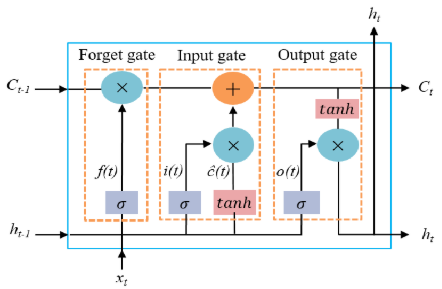

<img src="Media/ML/LSTM-1.jpg" width=700>

Steps in the LSTM unit:
- **Forget Gate**: 
  - This is the first stage in a Long Short-Term Memory unit determines what percentage of the Long-Term Memory is remembered
- **Input Gate**: 
  - This is the second stage, that consists of two blocks:
  - The one on the right combined STM and the Input to Create a Potential LTM
  - the block on the left determines what % of that Potential LM to add to LTM - it combined STM and Input
  - The output of this Gate / stage is added to LTM
  - So essentially this stage determines how we should update the LTM
- **Output Gate**:
  - This final stage updates the STM
  - It also has two blocks:
    - The right block gets the New LTM, get potential STM, then its output is modified by...
    - the output of the block on the left, which determines what % of that Potential STM is remembered 
    - As output of the entire gate, we get the New STM
    - This New STM is also the **Output from the entire LSTM unit**

Example of running data through the LSTM unit:

<img src="Media/ML/LSTM-2.jpg" width=700>

<img src="Media/ML/LSTM-3.jpg" width=700>


### GRU

Gated Recurrent Units, 2014

Key Idea: a simpler LSTM with fewer gates (update + reset)

✅ Advantages:
- Fewer parameters, faster training
- Performs comparably to LSTM in many tasks

❌ Disadvantages:
- Still sequential (can't paralellise well)
- Still limited with very long sequences

### seq2seq Encoder-Decoder

> Sequence-to-sequence (seq2seq) Encoder-Decoder NN

✅ Uses:
- Well suited for situations where the input and output are both sequences of arbitrary length, e.g. translation. 

❌ Disadvantages:
- **Information Bottleneck**: Encoder in the basic Encoder-Decoder unrolling the LSTMs compresses the entire input sentence into a single context vector in the final hidden state of the encoder. This works fine for short sentences, but for longer phrases, even with LSTMs, words that are input early on can be forgotten;
  - *This disadvantage is solved by Attention mechanism*


Features:
- Encoder reads and compresses;
- Decoder unfolds that summary into the target sentence, one word at a time, until `<EOS>`
- By decoupling the Encoder from the Decoder, the input text and the translated output text can be different lengths.

Simplified glance at the architecture:

<img src="Media/ML/encoder-decoder-2.jpg" width=500>

<img src="Media/ML/encoder-decoder-1.jpg" width=800>



Steps of the picture above:

- Break the input into tokens
  - Input is `Let's go <EOS>`
  - Turn each word into a vector using embeddings
- Encode the sentence
  - Now the Encoder reads the input and compresses its meaning
  - The Encoder is just stacked LSTM layers 
  - It reads tokens left-to-right, and at each step it updates a hidden state (green arrows across time)
  - After the last word, the encoder's final state summarises the whole input
  - Passes it to the Decoder
- Decoding
  - The Decoder starts with a special start token (e.g. `<SOS>`, or it can be `<EOS>`)
  - It uses the Encoder's summary + the current input token to produce the next word 
- Choose the word
  - The decoder produces raw scores ("logits") over the vocabulary (small grey numbers feeding the SoftMax box)
  - SoftMax converts those scores into probabilities for each word (the little probability boxes at the top), then you choose the most probable word, e.g. `Vamos`
- Feed the chosen word back and repeat
  - The chosen word becomes the next input to the decoder
  - It predicts again - here for the input of `vamos` it next chooses `<EOS>`

### seq2seq with attention


✅ Advantages:
- Much better at long sentences
- improves translation and summarisation

❌ Disadvantages:
- The computations are inherently sequential and cannot be parallelised across the input sequence; still built on top of RNN/LSTM, therefore, it's still sequential and slow.


Attention:
- Used in encoder-decoder transformers models
- Attention models are a type of neural network component that allows the model to selectively focus on different parts of the input when processing each token.

Self-attention: 
- differentially weighting the significance of each part of the input (which includes the recursive output) data. Allows the model to selectively focus on different part of the input sequence when processing each token. 
- efficiently captures long-range dependencies;

The main idea of Attention is to add an additional path for each input value so that each step of the Decoder can directly access those values.

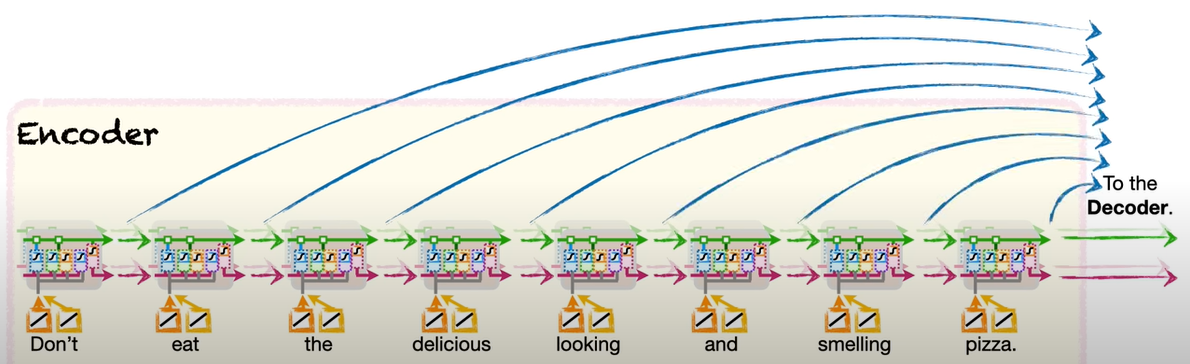


Attention lets decoder assign a different amount of weight, or attention, to each of the encoder states at every decoding timestep. By focusing on which input tokens are most relevant at each timestep, these attention-based models are able to learn nontrivial alignemnts between the words in a generated translation and those in a source sentence. 
- Different word orders in translation;
- The difference in the meaning of e.g. the word "apple" depending on the context (computers vs fruit)

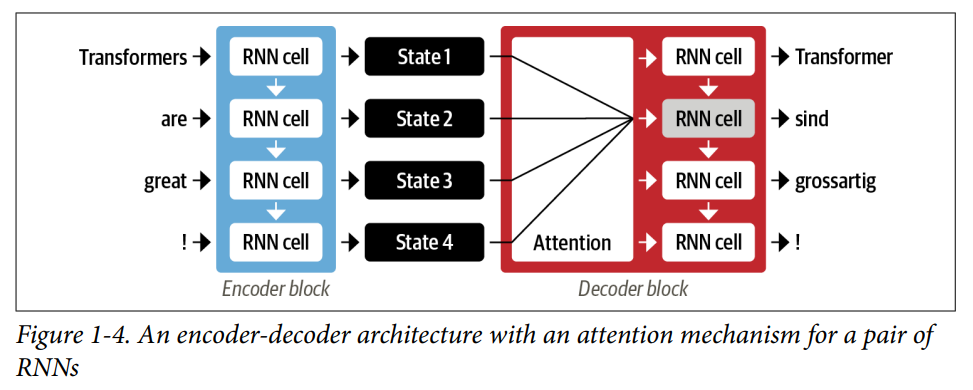

## Transformers

Transformer:
- Introduced in the paper ["Attention is All You Need", 2017](https://arxiv.org/abs/1706.03762), outperformed RNNs on many tasks
- Is a type of deep learning model based on self-attention technique that is widely used in processing sequential input data, NLP, and CV. 
- Basically they took seq2seq with attention, removed recurrence completely, and kept attention in form of self-attention

Uses:
- NLP: machine translation, text summarization, question answering

Features:
- Process the entire input all at once
- The attention mechanism provides context for any position in the input sequence

Transformers examples:
- GPT
- BERT
- etc.


The pip library `transformers` can be used for: 
- Text classification
- question-answering
- Masked language modelling
- text generation
- NER
- Text Summarisation
- Translation

✅ Advantages:
- Has many applications

❌ Disadvantages:
- **Language**: NLP research is dominated by the English language. There are several models for other languages, but it is harder to find pretrained models for rare or low-resource languages;
- **Data availability**: even with finetuning pre-trained models, the amount of data is still a lot;
- **Working with long documents**: self-attention works extremely well on paragraph-long texts, but it becomes very expensive when we move to longer texts like whole documents;
- **Opacity**: transformers are to a large extent opaque - it is hard or impossible to unravel the reason why a model made a certain prediction. 
- **Bias**: transformer models are predominantly pretrained on text data from the internet. This imprints all the biases that are present in the data into the models. 

## LLM

Terms: 
| Term | Definition |
| - | - |
| Maximum context size | Maximum input sequence length for a specified transformer model; is measured in tokens (basically equals to word). <br><br>E.g. Maximum context size for DistilBERT is 512 tokens. |

Examples of LLMs:
- **BERT** (Bidirectional Encoder Representations from Transformers)
  - **DistilBERT**: 
    - achieves comparable performance to BERT, while being significantly smaller and more efficient; 
    - Maximum context size: 512 tokens (a few paragraphs of text)
- **GPT** (Generative Pretrained Transformer)
- **Text-to-Text Transfer Transformer (T5)**
- GPT-2, RoBERTa, GPT-3

these models are so powerful that they gave rise to TL (transfer learning): AI technique in which a pre-trained model, initially trained on a large dataset for a specific task, is reused as a starting point for a different but related task. 

LLM (Large Language Models) have issues:
- No source provided;
- Out of date information;


You can take a pretrained model like DistilBERT and then modify it for your end use:

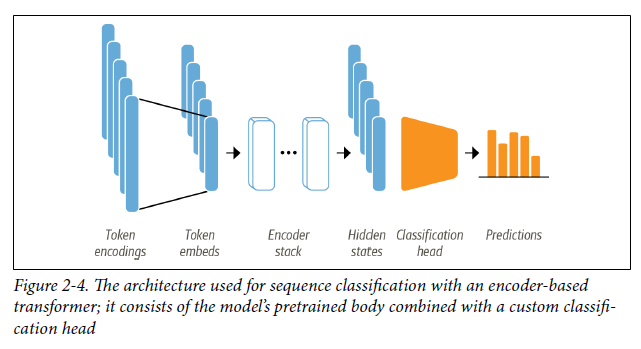

We have two options to convert pretrained model to meet our requirements:
- Feature extraction: 
  - we use the hidden states as features and just train a classifier on them, without modifying the pretrained model.
  - Advantage: we can quickly train a small model, e.g. a model that does not rely on gradients such as random forest
- Fine-tuning: we train the whole model end-to-end, which also updates the parameters of the pretrained model. 

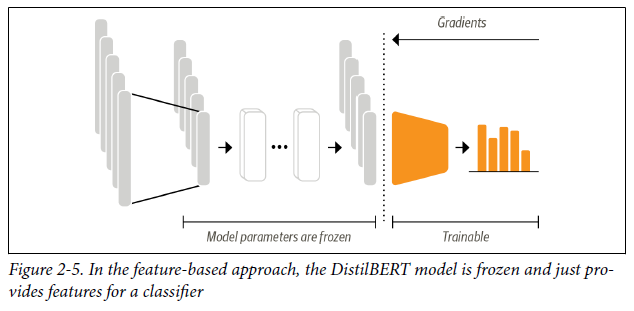

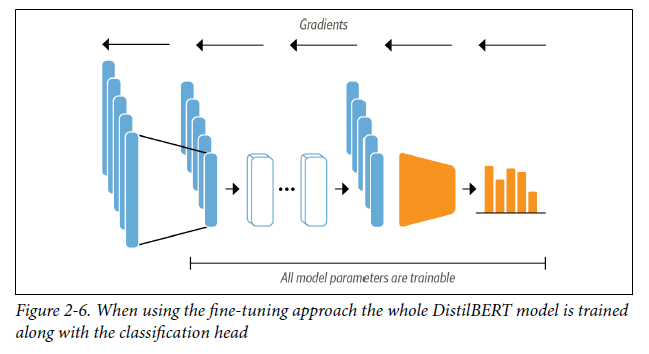


## RAG

RAG (retrieval-augmented generation):
- LLM first consults the data available;
- Then gives the user an answer;
- If the question cannot be answered based on the information it has, it should say "I don't know" instead of hallucinating;

# Tensorflow

Tensor - a vector of some dimensionality. 

Rank / degree - the number of dimensions involved in the tensor. 

Types of tensors:
- variable: mutable
- constant: immutable
- placeholder: immutable
- SparseTensor: immutable

In general, tensorflow has two kinds of API: 1. Keras sequential API and 2. Keras functional API.


## 1.Keras Sequential API

sequential architecture that uses global API. Here, input of the current layer can only originate from the previous layer, hence the name "sequential"

```py
from tensorflow.keras.layers import Input, Dense, LeakyReLU

### Method 1 of constructing a NN
model = tf.keras.Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=10, activation='sigmoid'))
model.add(LeakyReLU())
model.add(Dense(units=10))
model.add(LeakyReLU())
model.add(Dense(units=1))
model.add(LeakyReLU())

### Method 1.1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Method 2
# for each layer you can specify `name='layer1'`
# most commonly-used way to construct a NN
model = tf.keras.Sequential([
    Input(shape=(1,)),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='relu')
])

# or
layer_1 = keras.layers.Dense(units=3, activation='sigmoid')
layer_2 = keras.layers.Dense(units=1, activation='sigmoid')
model = tf.keras.Sequential([layer_1, layer_2])

# As an alternative to the "Flatten" layer, we could use "InputLayer"
keras.layers.InputLayer(shape=(28,28))

# Activation functions can be specified in different ways
# https://keras.io/api/layers/activations/
activation='relu'
activation=keras.activations.relu
```

---

This is an example of a 4-layer neural network:
```py
model = Sequential([

 Dense(units=25, activation="sigmoid"), ### 25 neurons

 Dense(units=15, activation="sigmoid"),

 Dense(units=10, activation="sigmoid"),

 Dense(units=1, activation="sigmoid")])
```

---

Loss functions:
- `sparse_categorical_crossentropy`: labels are provided as integers, e.g. index of label in a list
- `categorical_crossentropy`: labels are provided as one-hot encoded version

---

```py

### First, you compile
### First, you FIT the model 
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    validation_data=(X_valid,y_valid) # or validation_split=0.2
)

# then, you can visualise `history` as a plot
plt.plot(history.history['accuracy']) # or 'loss'
# this will plot accuracy; if you specified a validation set during `model.fit`, then it will show train - validation comparison, or if you specified a `validation_split=0.2`

# Instead of passing a validation set using the validation_data
# argument, you could instead set validation_split to the ratio of
# the training set that you want Keras to use for validation (e.g., 0.1).
```

## 2.Keras Functional API (Model) 

Here, you can specify layers as objects and inputs from whatever layer you want: e.g.:
```py
inputs = Input(shape=(30,))
x = Dense(units=100)(inputs)
block1 = Conv(...)(inputs)
...
block3 = Conv(...)(block1)
```

---

Saving and loading a model

```py
### save
model.save("my_keras_model.h5")
### load
model = keras.models.load_model("my_keras_model.h5")
```


In [ ]:
import tensorflow as tf

In [ ]:
# Some tensors of rank 0 (scalar)
string = tf.Variable('this is a string', tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

# tensors of higher rank
rank1_tensor = tf.Variable(['test', 'ok', 'tim'], tf.string)
rank2_tensor = tf.Variable([['test', 'ok', 'two'], ['test', 'yes', 'no']], tf.string)

# Print the rank of a tensor
print(tf.rank(rank2_tensor))

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
# Shape of a tensor - how many values there are in each dimension
rank2_tensor.shape

TensorShape([2, 3])

In [ ]:
# Changing shape of a tensor
tensor1 = tf.ones([1,2,3]) # Create a tensor full of ones of shape [1,2,3]
print(tensor1)

tensor2 = tf.reshape(tensor1, [2,3,1])
print(tensor2)

tensor3 = tf.reshape(tensor2, [3, -1])
print(tensor3)

tensor4 = tf.reshape(tensor1, [6])
print(tensor4)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1.], shape=(6,), dtype=float32)


In [ ]:
# Create a dataset from your own data
# by using a keras pipeline
import tensorflow as tf
tf.keras.utils.image_dataset_from_directory??
# data = tf.keras.utils.image_dataset_from_directory('data')
# If you have a ton of images, you can use iterator
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# Scale data
#  data = data.map(lambda x,y: (x/255, y))
# Train-test split
# train_size = int(len(data)*0.7)
# test_size = int(len(data)*0.1)+1
# val_size = int(len(data)*0.2)+1
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



## Layers

```py
### Standardisation layer
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)


### Layer parameters
Dense(3, activation='sigmoid', name='layer1')

### After training, get weights and biases of each layer
W1, b1 = model.get_layer("layer1").get_weights()


# Set weights from a previous run. 
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])


### Example of NN model for classifying ten digits from MNIST
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'), 
    Dense(units=10, activation='softmax')
])
model.compile(loss = SparseCategoricalCrossentropy())
```




## Simple example

Below is a very simple NN to learn to approximate the function $f(x) = 0.5\sin(2\pi x)+0.5$ in the interval $[0,1)$:


In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU

### Define f(x)
f = lambda x: 0.5 * np.sin(2 * np.pi * x) + 0.5
# f = lambda x: x**4 + 4*x**3 + 4.5*x**2 + x - 1
# f = lambda x: x**2

start, end = 0, 2
n = 3000
x_train = np.linspace(start, end, n)
y_train = f(np.linspace(start, end, n))

In [58]:
x_train

array([0.00000000e+00, 6.66888963e-04, 1.33377793e-03, ...,
       1.99866622e+00, 1.99933311e+00, 2.00000000e+00])

In [59]:
y_train

array([0.5       , 0.50209509, 0.50419014, ..., 0.49580986, 0.49790491,
       0.5       ])

In [60]:
# Define model
model1 = Sequential([
    Input(shape=(1,)),
    Dense(units=10, activation=LeakyReLU()), # sigmoid
    Dense(units=10, activation=LeakyReLU()),
    # Dense(units=20, activation=LeakyReLU()),
    Dense(units=1, activation=LeakyReLU())
])
model1.compile(
    loss='mse', # tf.keras.losses.BinaryCrossEntropy()
    optimizer='adam', 
    metrics=['mae', 'mse']
)
model1.summary()

history = model1.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    # callbacks = [viz_callback]
)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
94/94 [==============================] - 1s 2ms/step - loss: 0.2062 - mae: 0.3844 - mse: 0.2062
Epoch 2/60
94/94 [==============================] - 0s 2ms/step - loss: 0.1189 - mae: 0.3055 - mse: 0.1189
Epoch 3/60
94/94 [==============================] - 0s 1ms/step -

In [8]:
model2 = tf.keras.Sequential([
    Input(shape=(1,)),
    Dense(units=20, activation=LeakyReLU()),
    Dense(units=20, activation=LeakyReLU()),
    Dense(units=20, activation=LeakyReLU()),
    Dense(units=1, activation=LeakyReLU())
])
model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
model2.summary()

history = model2.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    # callbacks = [viz_callback]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                40        
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/60
94/94 [==============================] - 1s 1ms/step - loss: 0.1487 - mae: 0.3346 - mse: 0.1487
Epoch 2/60
94/94 [==============================] - 0s 1ms/step - loss: 0.1024 - mae: 0.2727 - mse: 0.1024
Epoch 3/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0999 - mae: 0.2687 - mse: 0.0999
Epoch 4/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0947 - mae: 0.2627 - mse: 0.0947
Epoch 5/60
94/94 [==============================] - 0s 3ms/step - loss: 0.0913 - mae: 0.2575 - mse: 0.0913
Epoch 6/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0892 - mae: 0.2545 - mse: 0.0892
Epoch 7/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0850 - mae: 0.2489 - mse: 0.0850
Epoch 8/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0801 - mae: 0.2407 - mse: 0.0801
Epoch 9/60
94/94 [==============================] - 0s 1ms/step - loss: 0.0734 - mae: 0.2307 - mse: 0.0734
Epoch 10/60
94/94 [==================

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 0s/step


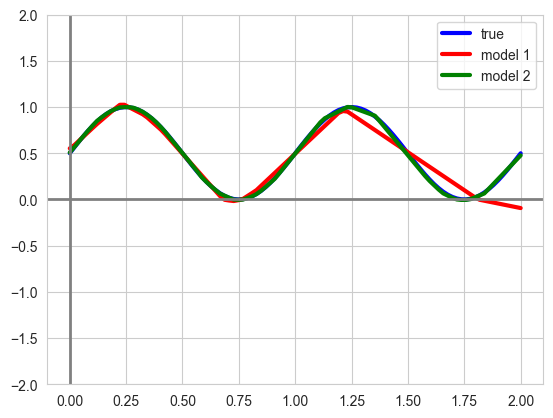

In [9]:
x_test =   np.linspace(start, end, 100)
y_test = f(np.linspace(start, end, 100))

plt.plot( x_test, y_test, lw=3, color='blue' )
plt.plot( x_test, model1.predict(x_test), lw=3, color='red' )
plt.plot( x_test, model2.predict(x_test), lw=3, color='green')
plt.legend(['true', 'model 1', 'model 2'])
sns.set_style('whitegrid')
plt.ylim([-2,2])
plt.axhline(0, color='grey', linewidth=2)
plt.axvline(0, color='grey', linewidth=2)

## Regularise a NN

tensorflow - how to regularise neural network:

```py
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=6, activation='linear')
        
        
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)

```

---

tensorflow - iterate to find optimal lambda:

```py
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

```


## simple linear regression NN



In [51]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU
import tensorflow as tf
import numpy as np

"""
The equation that describes the pattern below is x = 2y
"""
# x = [10, 20, 30, 40]
# y = [20, 40, 60, 80]
x = np.array([[10], [20], [30], [40]])
y = np.array([[20], [40], [60], [80]])

model = tf.keras.Sequential([
    Input(shape=(1,)),
    Dense(units=1, activation='linear')
])
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    patience=30,
    restore_best_weights=True
)
model.compile(
    # optimizer='adagrad',
    optimizer = tf.keras.optimizers.Adadelta(
        learning_rate=100.0
    ),
    loss = 'mean_squared_error'
)
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(
    x, y, 
    epochs=500,
    callbacks=[callback]
)

Epoch 1/500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 788.4432
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 579.7124
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 413.6794
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 288.9764
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 198.7014
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 135.0049
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 90.8888
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 60.7522
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 40.3796
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 26.7192
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 17.6191
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.5897
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.6135
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.0023
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3.2942
Epoch 16/500

In [53]:
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0389


0.03887367993593216

In [54]:
model.weights

[<Variable path=sequential_24/dense_24/kernel, shape=(1, 1), dtype=float32, value=[[1.9824294]]>,
 <Variable path=sequential_24/dense_24/bias, shape=(1,), dtype=float32, value=[0.42245483]>]

In [55]:
model.predict(np.array([100]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[198.66539]], dtype=float32)

In [2]:
!pip install tensorflow

^C


# CNN-1

In [51]:
"""
CIFAR-10 Image Dataset
It is a dataset that contains 60,000 32*32 tiny color images belonging to 10 classes (so 6,000 images per class) that represent everyday objects - airplane, automobile, bird, cat, etc. 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten


In [52]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print(train_images.shape)
print(train_images)

(50000, 32, 32, 3)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  

In [53]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [54]:
print(train_labels.shape)
print(train_labels)

(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [55]:
### normalise the pixel values for range 0-1
train_images, test_images = train_images / 255, test_images / 255
print(train_images.shape)

(50000, 32, 32, 3)


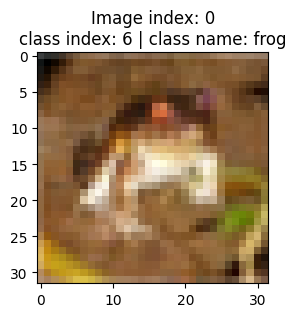

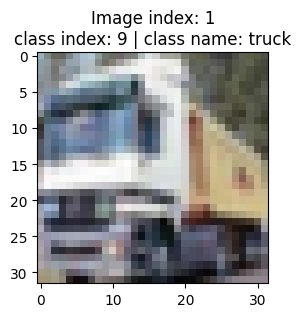

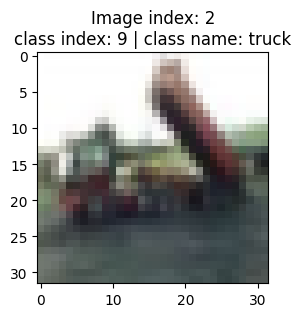

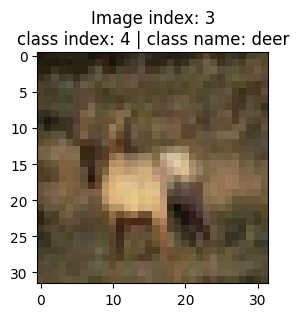

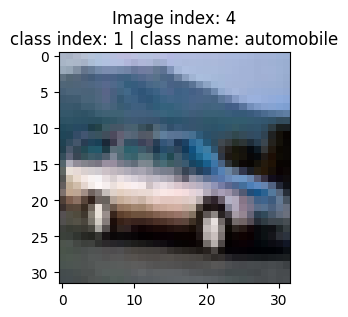

In [56]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

"""
check one image
"""
def show_image(IMG_INDEX):
    plt.figure(figsize=(3,3))
    plt.imshow(train_images[IMG_INDEX])
    plt.title(f"Image index: {IMG_INDEX}\nclass index: {train_labels[IMG_INDEX][0]} | class name: {class_names[train_labels[IMG_INDEX][0]]}");
    plt.show()
    return None

for i in range(5):
    show_image(i)

In [ ]:
model = tf.keras.Sequential([
    Input(shape=(32, 32, 3)),
    # conv layer 1
    Conv2D(
        32, # number of filters
        (3,3), # sample size - how big each filter is
        activation='relu',
        input_shape=(32,32,3)
    ),
    # To reduce dimensionality in this layer. Performs max pooling operation using 2x2 samples and stride of 2
    # maxpool layer 1
    MaxPooling2D((2,2)), # in max pooling layer, there are no parameters, as they simply reduce the image / combine pixels
    # conv layer 2
    Conv2D(64, (3,3), activation='relu'),
    # maxpool layer 2
    MaxPooling2D((2,2)),
    # conv layer 3
    Conv2D(64, (3,3), activation='relu'),
    # take these extracted features and add a way to classify them
    # flatten - put into one line
    Flatten(),
    # 64-neuron dense layer
    Dense(64, activation='relu'),
    # output layer - dense layer with 10 neurons, which correspond to 10 classes for classification
    Dense(10)
])
"""
calculating the number of parameters at each layer: 
number of parameters for a conv layer = (current_filter_width * current_filter_height * number_of_filters_in_previous_layer * number_of_filters_in_current_layer) + number_of_filters_in_current_layer

> remember that each convolution has a bias parameter value

conv layer 1:
- filter shape: 3x3
- number of filters at previous layer: 3
- number of filters at current layer: 32
- number_parameters = 3*3*3*32 + 32 = 896

maxpool layer 1:
- no trainable parameters

conv layer 2:
- filter shape: 3x3
- number of filters at previous layer: 32
- number of filters at current layer: 64
- number_parameters = 18,496
"""
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    patience=30,
    restore_best_weights=True
)
model.summary()

C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(train_images, train_labels)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.7613 - loss: 0.6770 - val_accuracy: 0.7888 - val_loss: 0.6149
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7770 - loss: 0.6342 - val_accuracy: 0.7692 - val_loss: 0.6499
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7868 - loss: 0.6037 - val_accuracy: 0.8068 - val_loss: 0.5515
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7997 - loss: 0.5678 - val_accuracy: 0.8259 - val_loss: 0.4982
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8112 - loss: 0.5337 - val_accuracy: 0.8260 - val_loss: 0.4987
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8221 - loss: 0.5043 - val_accuracy: 0.8320 - val_loss: 0.4851
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8307 - loss: 0.4693 - val_accuracy: 0.8478 - val_loss: 0.4313
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8384 -

In [60]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
# accuracy around 70%

313/313 - 1s - 5ms/step - accuracy: 0.7154 - loss: 0.9976
0.715399980545044


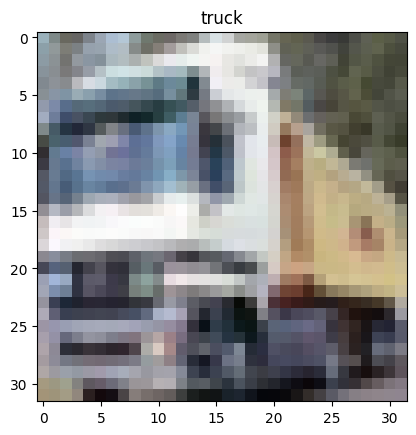

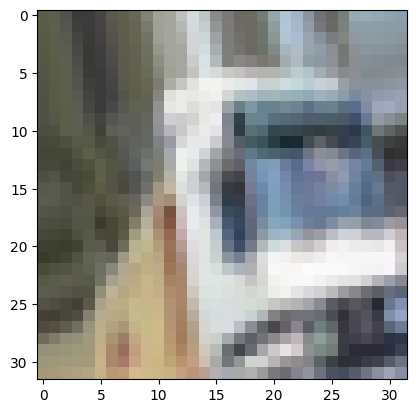

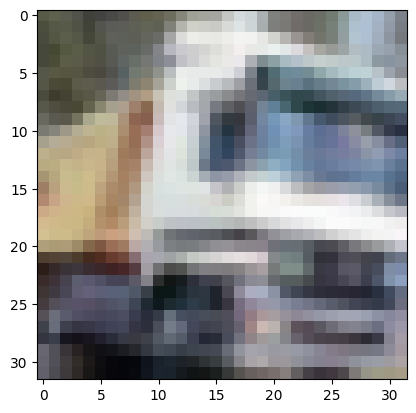

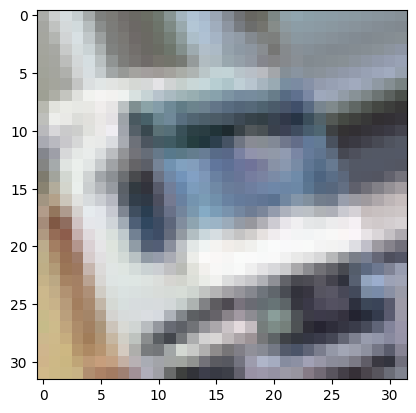

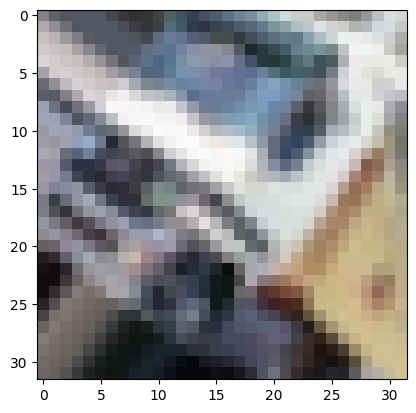

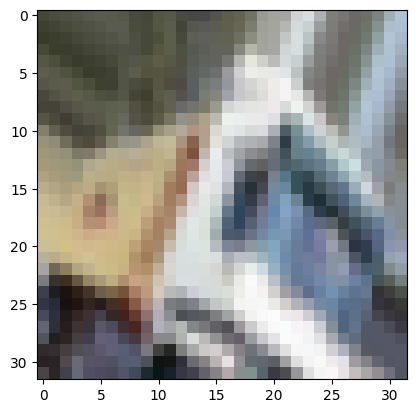

In [64]:
"""
working with small datasets
if we don't have millions of images, it is difficult to train CNN well. 
there are some techniques to train CNN's on small datasets consisting of few thousand images. 

Data Augmentation
performing random transformations on our images so that our model can generalize better
transformations: compressions, rotations, streches, color changes
"""


from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_index = 1

# create a data generator object that transforms images
dataget = ImageDataGenerator(
	rotation_range=40, 
	width_shift_range=0.2, 
	height_shift_range=0.2, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip = True, 
	fill_mode = 'nearest'
)

# pick an image to transform
plt.figure()
plt.imshow(train_images[image_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[image_index][0]])
plt.show()


test_img = train_images[image_index]
img = tf.keras.preprocessing.image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in dataget.flow(img, save_prefix='test', save_format='jpeg'): # this loop runs forever until we break, saving images to curdir
	plt.figure(i)
	plot = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
	i += 1
	# show 4 images
	if i > 4:
		break

plt.show()


# CNN-2

In [ ]:
# Pretrained models
"""
We can use pre-trained CNN and use as a part of our model to start our own model; we can finetune it, for our own purposes; 

"""

'\nWe can use pre-trained CNN and use as a part of our model to start our own model; we can finetune it, for our own purposes; \n\n'

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
	'cats_vs_dogs', 
	split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
	with_info=True,
	as_supervised = True,
)
get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels


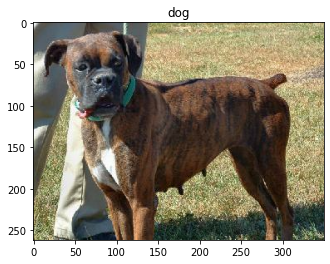

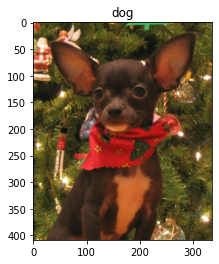

In [ ]:
# display 2 images from the dataset
for image, label in raw_train.take(2):
	plt.figure()
	plt.imshow(image)
	plt.title(get_label_name(label)) 

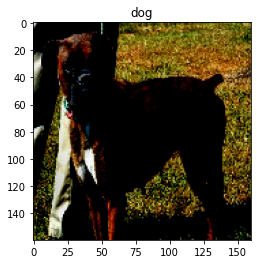

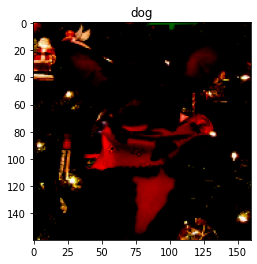

In [ ]:
# data preprocessing
IMG_SIZE = 160 # all images will be resized to IMG_SIZE x IMG_SIZE

def format_example(image, label):
	"""returns an image that's reshaped to IMG_SIZE"""
	image = tf.cast(image, tf.float32)
	image = (image/127.5) -1
	image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
	return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

# Let's take a look at some images
for image, label in train.take(2):
	plt.figure()
	plt.imshow(image)
	plt.title(get_label_name(label))

In [ ]:
# Let's compare shapes of original image vs new image
for img, label in raw_train.take(2):
	print(f'Original shape: {img.shape}')

for img, label in train.take(2):
	print(f"New shape: {img.shape}")


Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


In [ ]:
# picking a pre-trained model
"""
MobileNet V2 (google)
trained on 1.4 million images, 1000 classes in there

we want to use the convolutional base of this model, so we'll specify that we don't want to load the top (classification) layer. 
"""

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
	input_shape=IMG_SHAPE, 
	include_top = False, 
	weights='imagenet'
)


In [ ]:
# this base_model will output a shape (32,5,5,1280) tensor that is a feature extraction from our (1,160,160,3) image. 
base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
for image, _ in train_batches.take(1):
	pass

feature_batch = base_model(image)
print(feature_batch.shape)

NameError: name 'train_batches' is not defined